In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import fftpack


"""Generate random dnesity in 2d plane
    with power spectrum P(k) ~ 1/k^3
    
    1. for kx,ky: get |k|
    2. A(k) = |delta(k)| ~ rayleigh(1), phi(k) ~ U(0,2pi)
    3. multiply A(k) by sqrt{Pk} 
    4. FT-1 to get delta(x)
"""

'Generate random dnesity in 2d plane\n    with power spectrum P(k) ~ 1/k^3\n    \n    1. for kx,ky: get |k|\n    2. A(k) = |delta(k)| ~ rayleigh(1), phi(k) ~ U(0,2pi)\n    3. multiply A(k) by sqrt{Pk} \n    4. FT-1 to get delta(x)\n'

In [127]:
nx = 128
ny = 128
L0 = 200.

# generate a rayleigh distributed magnitude and uniform phase

# Pk = kk**(-3.)
kk = np.arange(-nx//2+1,nx//2+1)

# kx and ky: 
kx1d = np.zeros(nx)
kx1d[:nx//2+1] = kk[nx//2-1:]
kx1d[nx//2+1:] = kk[:nx//2-1]
kx1d *= 2*np.pi/ (L0*nx)

# get  agrid of kx and ky:
kxky = np.meshgrid(kx1d,kx1d) #.reshape(1,nx*ny)

kk = np.linalg.norm(kxky,axis=0)


Pk = 1. # kk**(-3.)
# Pk[0,0] = 0



In [128]:

# now generate rayleigh-distributed lengths:
Amp = np.random.rayleigh(1,(nx,ny)) / np.sqrt(2-.5*np.pi)
Amp *= Pk
print (Amp.std())

phase = np.random.rand(nx*ny).reshape((nx,ny)) * 2*np.pi

densktmp = Amp * np.exp(phase*1.0j)


# using fig. A.2 from D. Jeong PhD Thesis to fill dens[k]
densk = np.zeros((nx,ny),dtype='complex')

iNy = nx//2

densk[:iNy+1,:] = densktmp[:iNy+1,:]
densk[0,iNy+1:] = densktmp[0,iNy-1:0:-1].conj()
densk[iNy,iNy+1:] = densktmp[iNy+1,iNy-1:0:-1].conj()


densk[iNy+1:,1:iNy] = densktmp[iNy-1:0:-1,-1:iNy:-1].conj()
densk[iNy+1:,iNy+1:] = densktmp[iNy-1:0:-1,iNy-1:0:-1].conj()
densk[iNy+1:,0] = densktmp[iNy-1:0:-1,0].conj()
densk[iNy+1:,iNy] = densktmp[iNy-1:0:-1,iNy].conj()


1.0093145102288579


In [129]:
# Get inverse FFT: 

densr = fftpack.fft2(densk) / L0**2 # * L0/np.sqrt(2)

normdensk = np.abs(densk)
normdensr = np.abs(densr)

# check if normalization is correct:
toto = fftpack.fft2(densr) * (L0/nx)**2 
normdenstoto = np.abs(toto)
print (normdensk.std()**2,normdenstoto.std()**2/normdensr.std()**2/(nx**2/4))

1.0332665034482895 14.417838203708195


(256, 256)
0.9398893226771676 1.0562773370445249


Text(0, 0.5, '$y$')

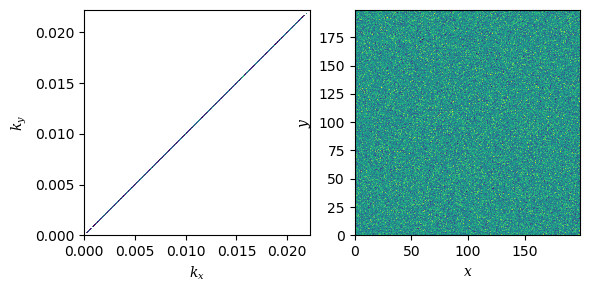

In [115]:
from matplotlib import colors 
fig,ax = plt.subplots(1,2)


kx = kx1d.copy()
kx[:iNy+1] = kx1d[:iNy+1]
kx[iNy+1:] += 2*np.pi/L0 * nx
# print (kk)


# print (1+normdensk)
print (np.shape(normdensk))

iax = ax[0]
# iax.pcolormesh(kx,kx,normdensk.T,norm=colors.LogNorm(vmin=1e-10,vmax=0.02))
iax.pcolormesh(kk,kk,normdensk.T) 
iax.set_aspect(1)
iax.set_ylabel("$k_y$")
iax.set_xlabel("$k_x$")

xx = np.arange(nx)/nx*L0
print ((1+densr.real.min()),(1+densr.real.max()))

iax = ax[1]
# iax.pcolormesh(xx,xx,np.reshape(densr,(nx,ny)))
iax.set_aspect(1)
# iax.pcolormesh(kx,kx,kk) 
iax.pcolormesh(xx,xx,(1+densr.real.T)) #,norm=colors.LogNorm(vmin=.95,vmax=1.05))
iax.set_xlabel("$x$")
iax.set_ylabel("$y$")


In [116]:
print (normdensr.std(), normdensk.std())

0.008224304883213603 0.9893540710340741


In [82]:
normdensk.std()

1.0043715014410113

In [83]:
normdensr

array([[0.00927894, 0.00077244, 0.03421528, ..., 0.00507949, 0.02287885,
        0.00150889],
       [0.00132871, 0.0072239 , 0.0064525 , ..., 0.00288226, 0.0102931 ,
        0.00237714],
       [0.00400796, 0.01783177, 0.00701031, ..., 0.01660262, 0.02342427,
        0.00906603],
       ...,
       [0.02131205, 0.02236745, 0.03391042, ..., 0.01572208, 0.02197166,
        0.00149823],
       [0.0066138 , 0.00783794, 0.01450705, ..., 0.01400332, 0.01599239,
        0.0019298 ],
       [0.00345457, 0.00744716, 0.02242447, ..., 0.00323748, 0.00667242,
        0.00367097]])

In [136]:
ff = np.random.randn(nx,nx)
print (ff.std())

1.0082262118376186


In [152]:
tf = fftpack.fft2(ff) / (nx/2)

In [153]:
print (np.linalg.norm(tf,axis=-1).std())

1.0000102721460242


In [156]:
fff = fftpack.ifft2(tf)
print (np.linalg.norm(fff,axis=-1).std())

0.011247871613227777
